# Desafio

## 1. Contextualização

Este projeto é parte da segunda fase de um processo seletivo da empresa X. Recebemos o conjunto de dados e somente as seguintes informações:

"-- 2ª Etapa de entrevista para vaga - Cientista de dados Jr.

Olá! Se você está lendo esta mensagem é porque te escolhemos para avançar em nosso processo seletivo! Parabéns =D
O intuito agora é verificar se você possuí a capacidade de execução, e para isso temos uma lista de desafios que deve ser entregue em Python.
Lembrando, você fará a apresentação do seu projeto em nossa próxima conversa, estamos ansiosos por isso. Rs
Utilize o arquivo "DF Cientista de dados Jr" como base de dados para seu projeto.
Confira os desafios logo a baixo, boa sorte!😉

-- Desafios
- ETL
- Engenharia de variávies
- Gráficos / Visualização
- Correlações
- Modelo para Classidicação - Variável target: Fumante
- Tunagem de modelo

**Caso queira fazer um webapp fique à vontade."

## 2. Tratamento dos dados, suposições e hipóteses

### 2.1 Importando bibliotecas


Primeiramente, vamos importar algumas bibliotecas que vamos usar:

In [1]:
#importing used libraries
import pandas as pd #Data manipulation
import numpy as np #Linear algebra
import matplotlib.pylab as plt #Plot
import seaborn as sns #Understanding variables

### 2.2 Extraindo o conjunto de dados do desafio

Vamos então importar o conjunto de dados (dataset) do desafio como um DataFrame da biblioteca Pandas e o chamarei de df_old, pois possivelmente deverão ser feitas algumas modificações.
Em seguida, analiso a quantidade de linhas e colunas do DataFrame, para termos uma ideia de sua dimensão e com o comando .head() podemos analisar as 5 primeiras linhas do DataFrame.

In [2]:
df_old = pd.read_csv('DF Cientista de dados Jr.csv')
print('Número de linhas:' , df_old.shape[0])
print('Número de colunas:' , df_old.shape[1])
print(df_old.columns)
df_old.head()

Número de linhas: 1338
Número de colunas: 7
Index(['Idade', 'Sexo', 'IMC', 'Filhos', 'Fumante', 'Regiao', 'Custos'], dtype='object')


,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.3 Manipulando o DataFrame

Somente com os dados que temos, não conseguiremos tirar informações sem algumas suposições. Temos informações sobre idade, sexo, filhos, região, custos e fumante ou não fumante. Não sabemos detalhes sobre Custo pois não nos foi informado, portanto, vamos tratar os dados e simultaneamente, buscar entender melhor o conjunto de dados.

A primeira coisa que notamos aqui é que Fumante, nossa variável de estudo, é representada com "yes" e "no" e também, diferentemente das "boas maneiras" da Ciência de Dados, ela não está posicionada na última coluna.

Então, vamos posicionar a coluna Fumante como sendo a última, trocar "yes" e "no" nela por 1 e 0, para facilitar a análise e vamos deixar toda a tabela em PT-BR.

Vamos criar um novo DataFrame, preservando o antigo e verificar se as mudanças foram efetuadas.

In [3]:
df = df_old.loc[:,['Idade', 'Sexo', 'IMC', 'Filhos', 'Regiao', 'Custos', 'Fumante']]
df.Fumante = df.Fumante.map(dict(yes=1, no=0))
df.Regiao = df.Regiao.map(dict(southwest = 'sudoeste', southeast = 'sudeste', northwest = 'noroeste', northeast = 'nordeste'))
df.Sexo = df.Sexo.map(dict(male = 'masculino', female = 'feminino'))
df.head()

,Idade,Sexo,IMC,Filhos,Regiao,Custos,Fumante
0,19,feminino,27.900,0,sudoeste,16884.92400,1
1,18,masculino,33.770,1,sudeste,1725.55230,0
2,28,masculino,33.000,3,sudeste,4449.46200,0
3,33,masculino,22.705,0,noroeste,21984.47061,0
4,32,masculino,28.880,0,noroeste,3866.85520,0


### 2.4 Verificação de dados extremos, nulos, vazios e repetidos

Agora, vamos verificar se tem algum valor extremo que possa parecer muito fora da realidade, como valores negativos para IMC, idade acima de 100, filhos acima de 10, IMC acima de 60... Ou algo que possa ajudar-nos a entender melhor as variáveis, principalmente a Custos, já que não temos muita informação no Dataset.

In [4]:
# Vizualization of extreme and mean values for checking if there is anything weird on the dataset that must be cleaned
print('Number of smokers:' , sum(df.Fumante))
df.describe()
# df.head()
# df['Fumante'].value_counts()

Number of smokers: 274


,Idade,IMC,Filhos,Custos,Fumante
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


Aqui, notamos que não temos valores muito anormais e que o valor máximo e mínimo de Custo é 63770,43 e 1121.87, e o valor médio é de 13270. Supondo que isso seja um valor em reais e que tenha alguma relação com a renda de cada indivíduo (não necessáriamente salário), acredito que possa ter alguma relação com o salário mínimo, na média. Se dividirmos 13270 por 12, temos 1105,83 reais. Como podemos verificar em [http://www.fetapergs.org.br/index.php/2015-07-27-16-46-22/tabelas-salario-minimo](http://www.fetapergs.org.br/index.php/2015-07-27-16-46-22/tabelas-salario-minimo), o salário mínimo de 2021 é 1100,00. Portanto, é razoável supormos que a coluna Custo se trata da renda individual durante o ano de 2021. Dessa forma, acredito que chegamos a um entendimento mais detalhado dos dados.

Podemos alterar o nome da coluna Custo para Renda_2021.

In [5]:
# df_old2 = df.copy()
# #df['Custos'] = df['Custos']/12.0
df = df.rename(columns={'Custos': 'Renda_2021'})

df.head()

,Idade,Sexo,IMC,Filhos,Regiao,Renda_2021,Fumante
0,19,feminino,27.900,0,sudoeste,16884.92400,1
1,18,masculino,33.770,1,sudeste,1725.55230,0
2,28,masculino,33.000,3,sudeste,4449.46200,0
3,33,masculino,22.705,0,noroeste,21984.47061,0
4,32,masculino,28.880,0,noroeste,3866.85520,0


Vamos verificar também se tem algum valor vazio (NAN) ou tipo de dado incoerente e que precise de alguma alteração. Frequentemente vemos valores de datas, por exemplo, sendo reconhecidas como object e não datatime.

In [6]:
# Getting info about NAN values and data types at the columns to see if there is something to be cleaned or manipulated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       1338 non-null   int64  
 1   Sexo        1338 non-null   object 
 2   IMC         1338 non-null   float64
 3   Filhos      1338 non-null   int64  
 4   Regiao      1338 non-null   object 
 5   Renda_2021  1338 non-null   float64
 6   Fumante     1338 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


De modo a ver se há outros valores únicos além de "masculino","feminino", "sudoeste","sudeste","nordeste","noroeste", façamos o seguinte:

In [7]:
# Counting the unique values at each column
df.nunique(axis = 0)

Idade           47
Sexo             2
IMC            548
Filhos           6
Regiao           4
Renda_2021    1337
Fumante          2
dtype: int64

In [8]:
# Unique values at the Regiao column
df.Regiao.unique()

array(['sudoeste', 'sudeste', 'noroeste', 'nordeste'], dtype=object)

Parece tudo ok!

### 2.5 Hipóteses

Em resumo, temos um DataFrame em PT-BR e com a nossa variável alvo localizada na última coluna.

Sobre os dados, temos as seguintes informações:

Sexo: masculino ou feminino.
Região: sudoeste, sudeste, nordeste, noroeste.
IMC: de 15.96 à 53.13.
Número de filhos: de 0 à 5.
Idade: de 18 à 64.
Renda em 2021: 1121.87 à 63770.43.
Fumante: sim ou não.

Por simplicidade, vamos considerar que os fumantes são exclusivamente fumantes de cigarro tradicional. O valor hoje de um maço de cigarro é em média 7.00 reais. Além disso, um estudo de 2013 revela que o brasileiro consome em média 17 cigarros por dia, e como em cada maço contém 20 cigarros, o gasto mensal fica em torno de 178.50 reais, 16.22% do salário mínimo de 2021 (Fonte: [http://g1.globo.com/pr/norte-noroeste/noticia/2015/07/pesquisa-mostra-que-fumante-gasta-r-10-mil-por-mes-com-cigarros.html](http://g1.globo.com/pr/norte-noroeste/noticia/2015/07/pesquisa-mostra-que-fumante-gasta-r-10-mil-por-mes-com-cigarros.html)).

Com isso, podemos formalizar algumas hipóteses:

1) Pessoas que ganham mais dinheiro, tem mais chances de serem fumantes.
2) Pessoas que moram em regiões mais caras têm maior probabilidade de serem fumantes.
3) Pessoas fumantes tendem a ter um IMC maior.
4) Fumantes independem do sexo ou da idade.
5) Fumantes vivem menos.

## 3. Análise exploratória dos dados

### 3.1 Entendendo o dataset
Vamos primeiramente analisar a taxa de fumantes para checar o balanceamento do dataset:

In [9]:
Fumante_rate = df.Fumante.value_counts() / len(df)
Fumante_rate

0    0.795217
1    0.204783
Name: Fumante, dtype: float64

d:\data science\projects for portfolio\desafio entrevista\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


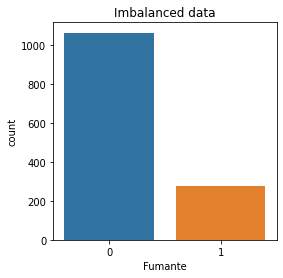

In [10]:
plt.figure(figsize=(4, 4))
sns.countplot('Fumante', data=df)
plt.title('Imbalanced data')
plt.show()

- Como podemos perceber, temos bem mais não fumantes que fumantes, portanto, deve-se tomar cuidado com isso durante a análise do modelo de aprendizado de máquina, já que coletamos dados aleatórios do conjunto, e com isso podemos pegar dados de não viciados, prejudicando o modelo.

In [11]:
Fumante_summary = df.groupby('Fumante')
Fumante_summary.mean()

,Idade,IMC,Filhos,Renda_2021
Fumante,,,,
0,39.385338,30.651795,1.090226,8434.268298
1,38.514599,30.708449,1.113139,32050.231832


In [12]:
Fumante_summary = df.groupby('Fumante')
Fumante_summary.median()

,Idade,IMC,Filhos,Renda_2021
Fumante,,,,
0,40.0,30.3525,1.0,7345.40530
1,38.0,30.4475,1.0,34456.34845


### 3.2 Correlações

A matriz de correlação fica:

<AxesSubplot:>

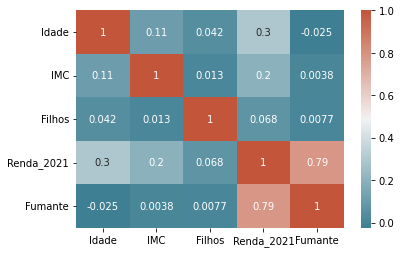

In [13]:
#Correlation matrix as a preliminar analysis
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

A matriz de correlação representa quão proporcional está um parâmetro de outro. Por exemplo, se analisarmos Fumante, apenas, vemos que Fumante possui uma correlação de 0.79 com Renda, 0.0077 com Filhos, 0.0038 com IMC e -0.025 com Idade. Portanto, somente pela análise da correlação, já conseguimos verificar que: renda é um grande diferencial entre fumantes e não fumantes.

Podemos também verificar a média de Filhos, IMC, Idade e Renda_2021 para fumantes e não fumantes:

In [14]:
#pd.pivot_table(df, index = 'Fumante', values = ['Idade', 'Sexo', 'IMC', 'Filhos', 'Regiao', 'Renda_2021'])

Aqui notamos outra vez que na média Filhos, IMC, Idade, são praticamente iguais tanto para fumantes como para não fumantes. No entando, a Renda_2021 média muda drasticamente, o que confirma mais uma vez, que fumantes costumam ter renda maior que não fumantes para manter o vício.

Podemos também comparar os fumantes por regiões diferentes e comparar se tem alguma variação muito grande.

### 3.3 Exploração de tabelas e gráficos: insights e questões

In [15]:
df_yes = df.loc[df["Fumante"] == 1]
df_no = df.loc[df["Fumante"] == 0]
print('Fumante  = 1')
print(pd.pivot_table(df_yes, index = 'Regiao', values = ['Idade', 'Sexo', 'IMC', 'Filhos', 'Renda_2021']))
print()
print()
print('Fumante  = 0')
print(pd.pivot_table(df_no, index = 'Regiao', values = ['Idade', 'Sexo', 'IMC', 'Filhos', 'Renda_2021']))

Fumante  = 1
            Filhos        IMC      Idade    Renda_2021
Regiao                                                
nordeste  1.044776  28.565224  38.238806  29673.536473
noroeste  1.275862  29.140431  39.327586  30192.003182
sudeste   1.000000  33.096703  39.736264  34844.996824
sudoeste  1.206897  31.005172  36.103448  32269.063494


Fumante  = 0
            Filhos        IMC      Idade   Renda_2021
Regiao                                               
nordeste  1.046693  29.332082  39.536965  9165.531672
noroeste  1.119850  29.212678  39.168539  8556.463715
sudeste   1.065934  33.442418  38.673993  8032.216309
sudoeste  1.127341  30.507865  40.183521  8019.284513


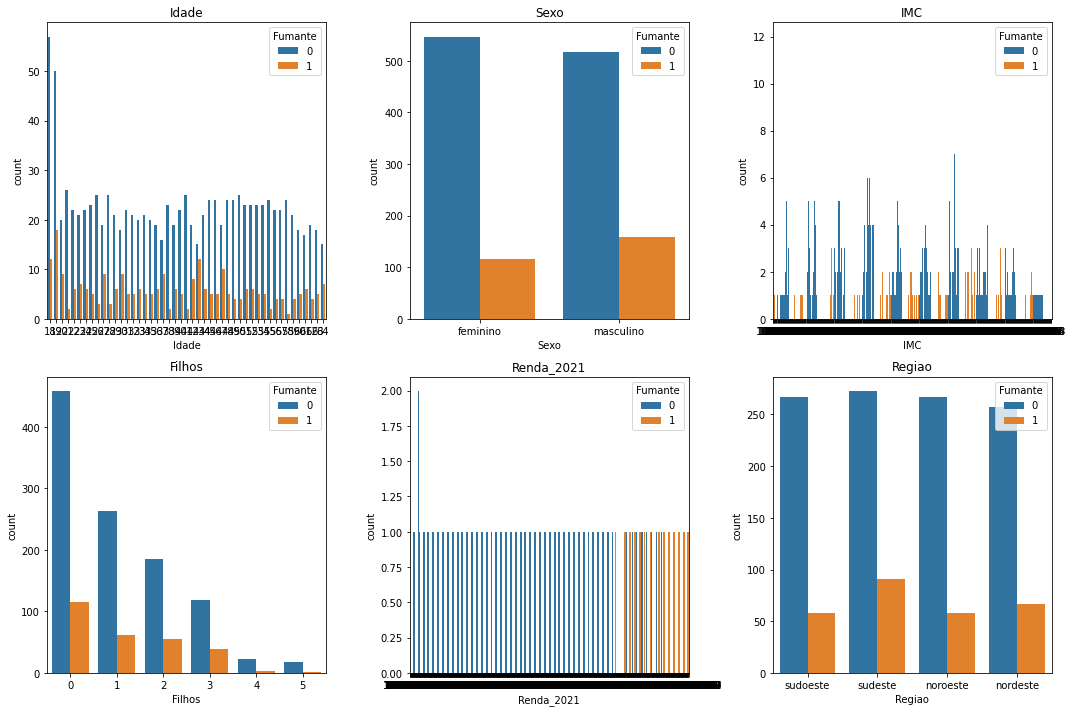

In [16]:
#Visualize the count of smokers for columns 'age', 'sex', 'IMC', 'sons', 'costs', and 'region'
cols = ['Idade', 'Sexo', 'IMC', 'Filhos', 'Renda_2021','Regiao']

n_rows = 2
n_cols = 3

#The subplot grid and the figure size of each graph
#This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):

        i = r*n_cols+ c #index to go through the number of columns
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(x = df[cols[i]], hue=df["Fumante"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Fumante", loc='upper right')

plt.tight_layout()   #tight_layout

-- Resumo:
- Pessoas com mais renda têm maior probabilidade de ser fumante.
- Homens tendem a fumar mais que mulheres
- Sudeste tem mais fumantes que as outras regiões.

-- Questões:
- Por que na região sudeste tem mais fumantes? Desigualdade econômica?
- O que causa o pico de fumantes dos 18 aos 20 anos?
- O que causa pessoas com 1 a 2 filhos terem maiores chances de serem fumantes?
- O que leva homens a terem maior probabilidade de serem fumantes? Desigualdade de renda entre homens e mulheres, talvez?

In [17]:
# Ratio of smokers per sex
df.groupby('Sexo')[['Fumante']].mean()

,Fumante
Sexo,
feminino,0.173716
masculino,0.235207


In [18]:
#Ratio of smokers per number of children
df.groupby('Filhos')[['Fumante']].mean()

,Fumante
Filhos,
0,0.200348
1,0.188272
2,0.229167
3,0.248408
4,0.120000
5,0.055556


In [19]:
#Ratio of smokers per Region
df.groupby('Regiao')[['Fumante']].mean()

,Fumante
Regiao,
nordeste,0.206790
noroeste,0.178462
sudeste,0.250000
sudoeste,0.178462


### 3.3.1 Renda vs Fumante

<AxesSubplot:xlabel='Fumante', ylabel='Renda_2021'>

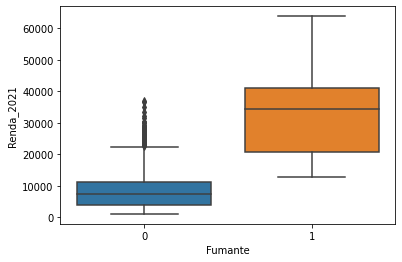

In [20]:
sns.boxplot(x="Fumante", y="Renda_2021",
                data=df)

-- Resumo:
- Fumantes tendem a ter uma renda maior que não fumantes.

### 3.3.1 Filhos vs Fumante

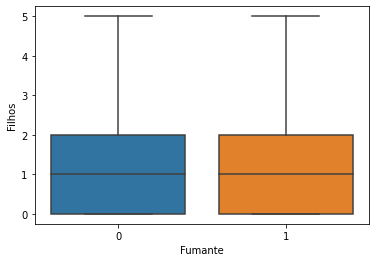

In [21]:
sns.boxplot(x="Fumante", y="Filhos",
                data=df)
xlabel='Fumante'
ylabel='Filhos'

-- Resumo:
- Número de filhos não parece ter relação com ser fumante ou não.
- Ainda fica em aberto a questão feita acima: O que causa pessoas com 1 a 2 filhos terem maiores chances de serem fumantes?

### 3.3.2 IMC vs Fumante

<AxesSubplot:xlabel='Fumante', ylabel='IMC'>

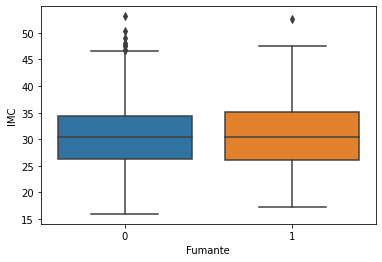

In [22]:
# sns.catplot(x="IMC", col="Fumante",
#                 data=df,kind="box",
#                 height=4, aspect=1.1);
sns.boxplot(x="Fumante", y="IMC",
                data=df)

-- Resumo:
- Pessoas fumantes não parecem ter IMC diferente de pessoas não fumantes.

### 3.3.2 Sexo vs Fumante

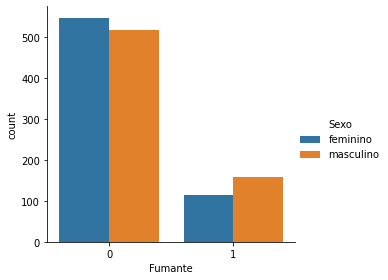

In [23]:
sns.catplot(x="Fumante", hue="Sexo",
                data=df, kind="count",

                height=4, aspect=1.1);

-- Resumo:
- Temos mais homens fumantes do que mulheres.

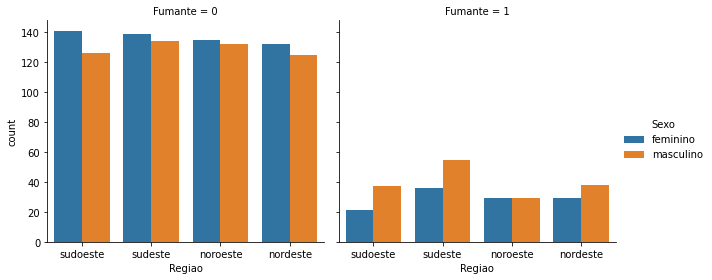

In [24]:
sns.catplot(x="Regiao", hue="Sexo", col="Fumante",
                data=df, kind="count",

                height=4, aspect=1.1);

-- Resumo:
- Tem mais mulheres não fumantes que homens não fumantes nas 4 regiões:
- Temos mais homens fumantes que mulheres fumantes, exceto noroeste que parece igual.

### Idade vs Fumante

<AxesSubplot:xlabel='Fumante', ylabel='Idade'>

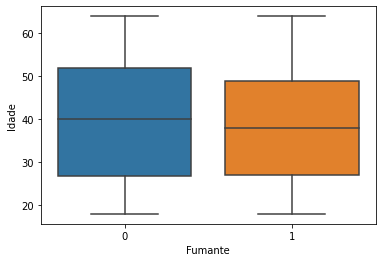

In [25]:
# sns.catplot(x='Idade', col="Fumante",
#                 data=df,kind="box",
#                 height=4, aspect=1.1);
sns.boxplot(x="Fumante", y="Idade",
                data=df)

-- Resumo
- Fumantes vivem cerca de 2 anos menos.

In [26]:
#Look at smoker rate by sex, age and region
Idade = pd.cut(df['Idade'], [18, 20, 80])
df.pivot_table('Fumante', [Idade])

,Fumante
Idade,
"(18, 20]",0.278351
"(20, 80]",0.200512


-- Resumo:
- Há uma porcentagem maior de fumantes entre 18 e 20 anos.

-- Questões:
- O que leva jovens a fumarem mais?

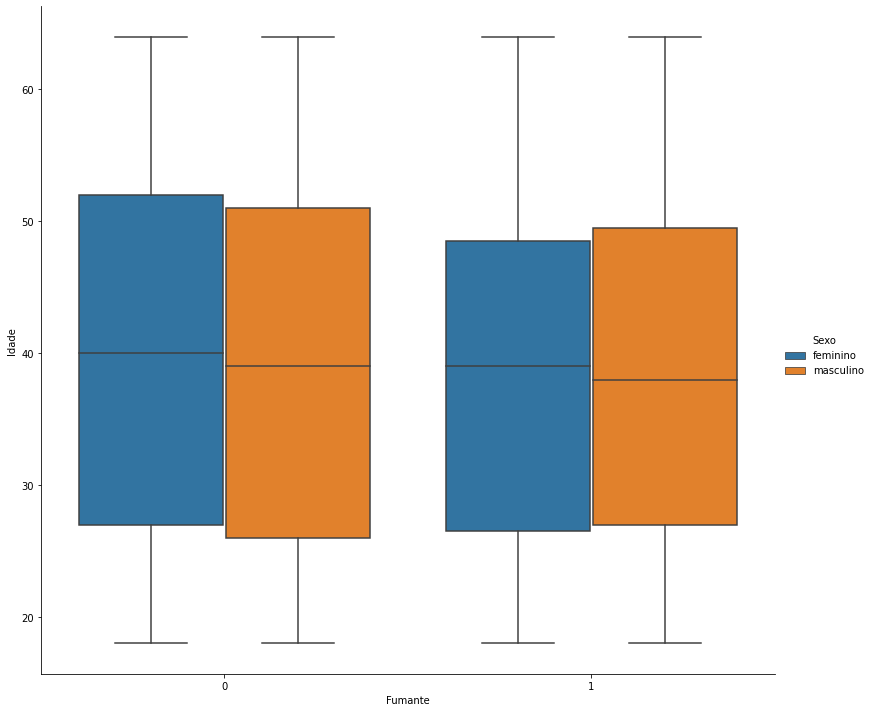

In [27]:
sns.catplot(x="Fumante", y="Idade", hue = 'Sexo',
                data=df, kind="box",
                height=10, aspect=1.1);

-- Resumo
- Homens vivem 1 ano a menos que mulheres.
- A idade média de fumantes diminui em ambos os sexos quando comparado a não fumantes.

In [28]:
df_yes.groupby('Sexo').describe()

Idade                                                        IMC  \
           count       mean        std   min   25%   50%   75%   max  count   
Sexo                                                                          
feminino   115.0  38.608696  14.217419  18.0  26.5  39.0  48.5  64.0  115.0   
masculino  159.0  38.446541  13.751247  18.0  27.0  38.0  49.5  64.0  159.0   

                      ...   Renda_2021              Fumante                 \
                mean  ...          75%          max   count mean  std  min   
Sexo                  ...                                                    
feminino   29.608261  ...  40918.31450  63770.42801   115.0  1.0  0.0  1.0   
masculino  31.504182  ...  41797.58905  62592.87309   159.0  1.0  0.0  1.0   

                               
           25%  50%  75%  max  
Sexo                           
feminino   1.0  1.0  1.0  1.0  
masculino  1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [29]:
df_no.groupby('Sexo').describe()

Idade                                                        IMC  \
           count       mean        std   min   25%   50%   75%   max  count   
Sexo                                                                          
feminino   547.0  39.691042  14.025538  18.0  27.0  40.0  52.0  64.0  547.0   
masculino  517.0  39.061896  14.150768  18.0  26.0  39.0  51.0  64.0  517.0   

                      ...  Renda_2021              Fumante                 \
                mean  ...         75%          max   count mean  std  min   
Sexo                  ...                                                   
feminino   30.539525  ...  11786.1666  36910.60803   547.0  0.0  0.0  0.0   
masculino  30.770580  ...  10959.3300  32108.66282   517.0  0.0  0.0  0.0   

                               
           25%  50%  75%  max  
Sexo                           
feminino   0.0  0.0  0.0  0.0  
masculino  0.0  0.0  0.0  0.0  

[2 rows x 40 columns]

### 3.3.3 Sexo vs Renda

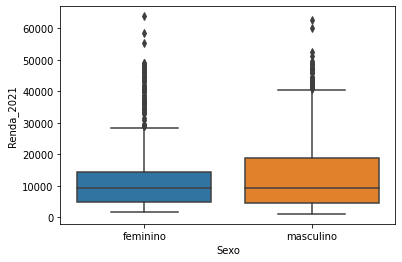

In [30]:
sns.boxplot(x="Sexo", y="Renda_2021",
                data=df)
xlabel='Sexo'
ylabel='Renda_2021'

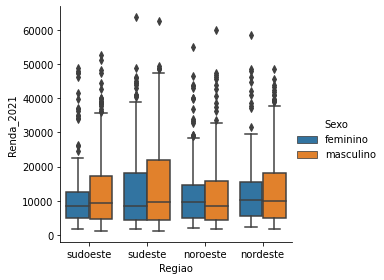

In [31]:
sns.catplot(x="Regiao", y="Renda_2021", hue = 'Sexo',
                data=df, kind="box",
                height=4, aspect=1.1);

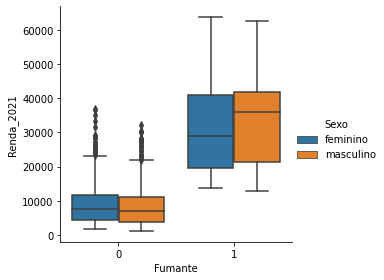

In [32]:
sns.catplot(x="Fumante", y="Renda_2021", hue = 'Sexo',
                data=df, kind="box",
                height=4, aspect=1.1);

-- Resumo:
- Renda desigual entre homens e mulheres está relacionado com o fato de homens fumarem mais que mulheres.

-- Questões:
- Por que mulheres que não fumam ganham mais que os homens? Ou está dentro do erro esperado?

### 3.3.4 Renda vs Região

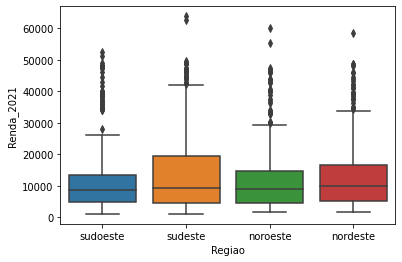

In [33]:
sns.boxplot(x="Regiao", y="Renda_2021",
                data=df)
xlabel='Regiao'
ylabel='Renda_2021'

-- Resumo:
 - Assim como o número de fumantes é maior no Sudeste, temos uma renda maior nessa região.

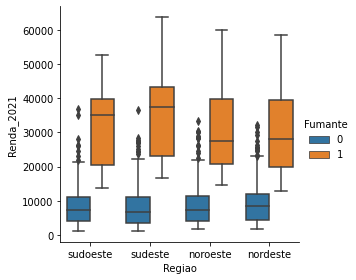

In [34]:
sns.catplot(x="Regiao", y="Renda_2021", hue = 'Fumante',
                data=df, kind="box",
                height=4, aspect=1.1);

-- Resumo:
- Aqui vemos explicitamente que a renda dos fumantes em todas as regiões é maior.

-- Questões:
- Por que temos mais fumantes no sudeste? Região mais fria? Região onde tem mais renda tem mais pessoas estressadas devido ao trabalho (overwork) e levando a mais pessoas fumantes?

-- Propostas:
- De modo a analisar o excesso de estresse, seria interessante checar dados sobre o alcoolismo. (Dependendo do propósito da pesquisa)

# 4. Modelagem (Classificação)

Para fazermos a modelagem, precisamos que todos os objetos virem valores passíveis de serem tratados pelos métodos de classificação. Dessa forma, transformando valores de Região e Sexo em números inteiros, temos:

In [35]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
df.iloc[:,1]= labelencoder.fit_transform(df.iloc[:,1].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
df.iloc[:,4]= labelencoder.fit_transform(df.iloc[:,4].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(df['Sexo'].unique())
print(df['Regiao'].unique())

[0 1]
[3 2 1 0]


Vamos separar nosso DataFrame em X e Y, com Y sendo nossa variável alvo.

In [36]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

Agora, podemos separar 80% dos nossos dados para treinamento e 20% para teste do modelo.

In [37]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123, stratify=Y)

In [38]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Correção do desbalanceamento dos dados para melhorar os resultados do modelo.

In [39]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
#X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, Y_resampled = method.fit_resample(X_train, Y_train)

df_Y_resampled = pd.DataFrame(Y_resampled)
df_Y_resampled_rate = df_Y_resampled.value_counts() / len(df_Y_resampled)
df_Y_resampled_rate

0    0.5
1    0.5
dtype: float64

Função contendo os modelos de classificadores:

In [40]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):

  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(C = 0.05, kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=3)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=3)
  forest.fit(X_train, Y_train)

  #Using XGBClassifier
  import xgboost
  xgb = xgboost.XGBClassifier(n_estimators = 2,use_label_encoder = False,eval_metric = 'logloss')
  xgb.fit(X_train, Y_train)

  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[7]XGBoost Classifier Training Accuracy:', xgb.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb

Treinando os modelos no X e Y balanceados:

In [41]:
#Get and train all of the models
model = models(X_resampled,Y_resampled)

[0]Logistic Regression Training Accuracy: 0.9780701754385965
[1]K Nearest Neighbor Training Accuracy: 0.9843358395989975
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9655388471177945
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9755639097744361
[4]Gaussian Naive Bayes Training Accuracy: 0.9072681704260651
[5]Decision Tree Classifier Training Accuracy: 0.9824561403508771
[6]Random Forest Classifier Training Accuracy: 0.9555137844611529
[7]XGBoost Classifier Training Accuracy: 0.9837092731829574


In [42]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test))
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print('Model[{}] Testing Precision = "{} !"'.format(i,  (TP) / (TP + FP)))
   print()# Print a new line

[[253  13]
 [  0  69]]
Model[0] Testing Accuracy = "0.9611940298507463 !"
Model[0] Testing Precision = "0.8414634146341463 !"

[[250  16]
 [  2  67]]
Model[1] Testing Accuracy = "0.9462686567164179 !"
Model[1] Testing Precision = "0.8072289156626506 !"

[[247  19]
 [  0  69]]
Model[2] Testing Accuracy = "0.9432835820895522 !"
Model[2] Testing Precision = "0.7840909090909091 !"

[[253  13]
 [  1  68]]
Model[3] Testing Accuracy = "0.9582089552238806 !"
Model[3] Testing Precision = "0.8395061728395061 !"

[[247  19]
 [ 12  57]]
Model[4] Testing Accuracy = "0.9074626865671642 !"
Model[4] Testing Precision = "0.75 !"

[[253  13]
 [  1  68]]
Model[5] Testing Accuracy = "0.9582089552238806 !"
Model[5] Testing Precision = "0.8395061728395061 !"

[[241  25]
 [  4  65]]
Model[6] Testing Accuracy = "0.9134328358208955 !"
Model[6] Testing Precision = "0.7222222222222222 !"

[[255  11]
 [  3  66]]
Model[7] Testing Accuracy = "0.9582089552238806 !"
Model[7] Testing Precision = "0.8571428571428571 !"

In [43]:
# #('Idade', 'IMC', 'Renda_2021')
# do_I_smoke2 = [[33,22.70, 22000]]
# #Print Prediction of Random Forest Classifier model
# pred = model[0].predict(do_I_smoke2)
# print(pred)
#
# if pred == 1:
#   print('You possibly are a smoker')
# else:
#   print('You possibly do not smoke')

#### O melhor modelo é o de Regressão Logística, com acurácia de 96.41%, mas com a maior precisão 85.18%.

In [44]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
#Get the importance of the features
logreg = model[0]
importances = pd.DataFrame({'feature':df.iloc[:, :-1].columns,'importance':np.round(logreg.coef_[0],3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

# # get importance
# importance = logreg.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


# logreg = model[0]
# importances = pd.DataFrame({'feature':df.iloc[:, :-1].columns,'importance':np.round(tree.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances

,importance
feature,
Renda_2021,5.266
Regiao,0.178
Sexo,0.160
Filhos,-0.324
Idade,-1.488
IMC,-2.362


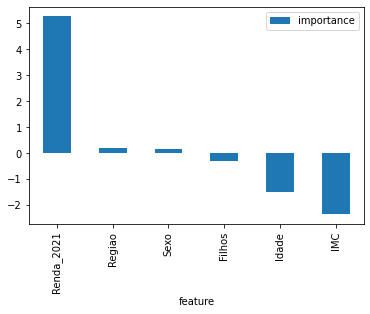

In [45]:
#Visualize the importance
importances.plot.bar()
xlabel='feature'

#### Com a importância, podemos eliminar alguns parâmetros que não são tão importante para o nosso modelo, como sexo, região e filhos.

In [46]:
#Print Prediction of Logistic Regression Classifier model
pred = model[0].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1]

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0

# 5. Tunagem do modelo

>1, train: 0.930, test: 0.916
>2, train: 0.930, test: 0.916
>3, train: 0.970, test: 0.955
>4, train: 0.974, test: 0.955
>5, train: 0.982, test: 0.946
>6, train: 0.987, test: 0.952
>7, train: 0.989, test: 0.949
>8, train: 0.993, test: 0.943
>9, train: 0.999, test: 0.961
>10, train: 0.999, test: 0.952
>11, train: 1.000, test: 0.952
>12, train: 1.000, test: 0.952
>13, train: 1.000, test: 0.946
>14, train: 1.000, test: 0.952
>15, train: 1.000, test: 0.949
>16, train: 1.000, test: 0.952
>17, train: 1.000, test: 0.952
>18, train: 1.000, test: 0.943
>19, train: 1.000, test: 0.955
>20, train: 1.000, test: 0.949


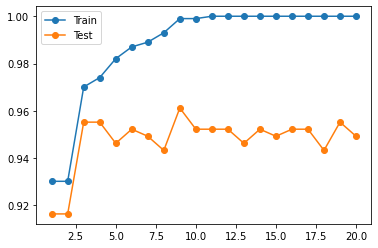

In [47]:
#DecisionTree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.937
>2, train: 0.978, test: 0.916
>3, train: 0.976, test: 0.928
>4, train: 0.967, test: 0.916
>5, train: 0.964, test: 0.931
>6, train: 0.956, test: 0.916
>7, train: 0.958, test: 0.910
>8, train: 0.950, test: 0.913
>9, train: 0.951, test: 0.916
>10, train: 0.945, test: 0.907
>11, train: 0.948, test: 0.904
>12, train: 0.942, test: 0.899
>13, train: 0.942, test: 0.904
>14, train: 0.938, test: 0.899
>15, train: 0.940, test: 0.901
>16, train: 0.924, test: 0.893
>17, train: 0.926, test: 0.896
>18, train: 0.920, test: 0.893
>19, train: 0.923, test: 0.890
>20, train: 0.915, test: 0.893
>21, train: 0.915, test: 0.890
>22, train: 0.914, test: 0.878
>23, train: 0.914, test: 0.875
>24, train: 0.912, test: 0.875
>25, train: 0.913, test: 0.878
>26, train: 0.910, test: 0.881
>27, train: 0.910, test: 0.878
>28, train: 0.905, test: 0.881
>29, train: 0.906, test: 0.884
>30, train: 0.905, test: 0.881
>31, train: 0.906, test: 0.878
>32, train: 0.906, test: 0.884
>33, train: 0.906

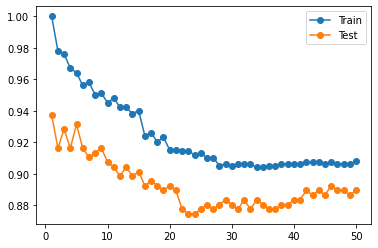

In [48]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
#X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.976, test: 0.946
>2, train: 0.979, test: 0.955
>3, train: 0.979, test: 0.955
>4, train: 0.987, test: 0.958
>5, train: 0.989, test: 0.961
>6, train: 0.988, test: 0.961
>7, train: 0.989, test: 0.961
>8, train: 0.990, test: 0.961
>9, train: 0.990, test: 0.961
>10, train: 0.990, test: 0.961
>11, train: 0.994, test: 0.964
>12, train: 0.994, test: 0.961
>13, train: 0.994, test: 0.949
>14, train: 0.995, test: 0.955
>15, train: 0.995, test: 0.955
>16, train: 0.995, test: 0.949
>17, train: 0.996, test: 0.952
>18, train: 0.997, test: 0.958
>19, train: 0.996, test: 0.958


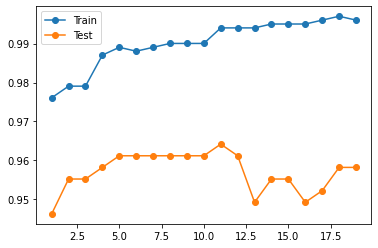

In [49]:
#XGBCLassifier

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
import xgboost
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = xgboost.XGBClassifier(n_estimators =i,use_label_encoder = False, eval_metric = 'logloss')
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.895, test: 0.872
>2, train: 0.901, test: 0.875
>3, train: 0.904, test: 0.878
>4, train: 0.919, test: 0.899
>5, train: 0.955, test: 0.940
>6, train: 0.962, test: 0.952
>7, train: 0.965, test: 0.964
>8, train: 0.968, test: 0.964
>9, train: 0.968, test: 0.964
>10, train: 0.968, test: 0.964
>11, train: 0.967, test: 0.964
>12, train: 0.967, test: 0.964
>13, train: 0.967, test: 0.964
>14, train: 0.967, test: 0.964
>15, train: 0.967, test: 0.964
>16, train: 0.967, test: 0.964
>17, train: 0.967, test: 0.964
>18, train: 0.967, test: 0.964
>19, train: 0.967, test: 0.964


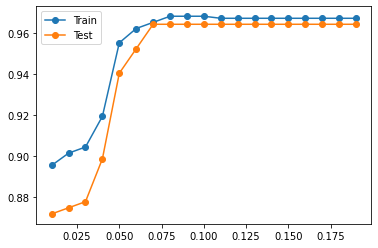

In [50]:
#SVM linear

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
values_np = np.array(values)/100.0
#evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = SVC(C = i/100.0, kernel = 'linear', random_state = 0)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values_np, train_scores, '-o', label='Train')
pyplot.plot(values_np, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


## 5.1 Remoção de Parâmetros não importantes

In [51]:
df2 = df.copy()
df2.drop('Regiao', axis=1, inplace=True)
df2.drop('Filhos', axis=1, inplace=True)
df2.drop('Sexo', axis=1, inplace=True)
df2.head()

,Idade,IMC,Renda_2021,Fumante
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


In [52]:
#Split the data into independent 'X' and dependent 'Y' variables
X2 = df2.iloc[:, :-1].values
Y2 = df2.iloc[:, -1].values

In [53]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25, random_state = 123, stratify=Y2)

In [54]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X2_train = sc2.fit_transform(X2_train)
X2_test = sc2.transform(X2_test)

In [55]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
#X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X2_resampled, Y2_resampled = method.fit_resample(X2_train, Y2_train)

df_Y2_resampled = pd.DataFrame(Y2_resampled)
df_Y2_resampled_rate = df_Y2_resampled.value_counts() / len(df_Y2_resampled)
df_Y2_resampled_rate

0    0.5
1    0.5
dtype: float64

In [56]:
#Get and train all of the models
model2 = models(X2_resampled,Y2_resampled)

[0]Logistic Regression Training Accuracy: 0.9774436090225563
[1]K Nearest Neighbor Training Accuracy: 0.9868421052631579
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9649122807017544
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9736842105263158
[4]Gaussian Naive Bayes Training Accuracy: 0.8972431077694235
[5]Decision Tree Classifier Training Accuracy: 0.9824561403508771
[6]Random Forest Classifier Training Accuracy: 0.9592731829573935
[7]XGBoost Classifier Training Accuracy: 0.9837092731829574


In [57]:
from sklearn.metrics import confusion_matrix
bestModelNumber = 1 #Used to export confusion matrix data
for i in range(len(model2)):
   cm2 = confusion_matrix(Y2_test, model2[i].predict(X2_test))
   #extracting TN, FP, FN, TP
   TN2, FP2, FN2, TP2 = confusion_matrix(Y2_test, model2[i].predict(X2_test)).ravel()
   print(cm2)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP2 + TN2) / (TP2 + TN2 + FN2 + FP2)))
   print('Model[{}] Testing Precision = "{} !"'.format(i,  (TP2) / (TP2 + FP2)))
   print()# Print a new line
   if i == bestModelNumber:
        # confusionMatrixData = [TN2, FP2, FN2, TP2]
        # confusionMatrixLabels = ['TN','FP','FN','TP']
        truePositiveRate = TP2/(TP2+FN2)
        trueNegativeRate = TN2/(TN2+FP2)
        print('You chose this model')
        # print('Collecting confusion matrix data from the best model: confusionMatrixData = ' , confusionMatrixData)
        # print('Collecting confusion matrix labels from the best model: confusionMatrixLabel = ' , confusionMatrixData)
        print()
   else:
       continue

[[253  13]
 [  0  69]]
Model[0] Testing Accuracy = "0.9611940298507463 !"
Model[0] Testing Precision = "0.8414634146341463 !"

[[255  11]
 [  2  67]]
Model[1] Testing Accuracy = "0.9611940298507463 !"
Model[1] Testing Precision = "0.8589743589743589 !"

You chose this model

[[247  19]
 [  0  69]]
Model[2] Testing Accuracy = "0.9432835820895522 !"
Model[2] Testing Precision = "0.7840909090909091 !"

[[253  13]
 [  0  69]]
Model[3] Testing Accuracy = "0.9611940298507463 !"
Model[3] Testing Precision = "0.8414634146341463 !"

[[247  19]
 [  7  62]]
Model[4] Testing Accuracy = "0.9223880597014925 !"
Model[4] Testing Precision = "0.7654320987654321 !"

[[253  13]
 [  1  68]]
Model[5] Testing Accuracy = "0.9582089552238806 !"
Model[5] Testing Precision = "0.8395061728395061 !"

[[241  25]
 [  0  69]]
Model[6] Testing Accuracy = "0.9253731343283582 !"
Model[6] Testing Precision = "0.7340425531914894 !"

[[255  11]
 [  3  66]]
Model[7] Testing Accuracy = "0.9582089552238806 !"
Model[7] Testin

#### O melhor modelo agora é o KNN, com 96.11% de acurácia e 85% de precisão.

# De acordo com o modelo, eu sou um fumante?

In [58]:
#('Idade', 'IMC', 'Renda_2021')
do_I_smoke = [[24,26,33000]]
#Print Prediction of Random Forest Classifier model
pred2 = model2[1].predict(sc2.transform(do_I_smoke))
print(pred2)

if pred2 == 1:
  print('You possibly are a smoker')
else:
  print('You possibly do not smoke')


[1]
You possibly are a smoker


# 6. Conclusões

Sobre as hipóteses:

1) Pessoas que ganham mais dinheiro, tem mais chances de serem fumantes?
    Confirmado, as pessoas com uma renda maior tem mais chances de manter o vício do tabajismo, possivelmente pelo alto preço do maço de cigarro hoje em dia. Isso reforça que as políticas de aumento do preço do cigarro causaram o decaimento de fumantes (Fonte: http://direito.folha.uol.com.br/blog/tabagismo-o-consumo-caiu-por-causa-do-preo-maior-ou-junto-com-o-aumento-do-preo)
2) Pessoas que moram em regiões mais caras têm maior probabilidade de serem fumantes.
    Confirmado, mas seria interessante obter dados de regiões mais desiguais para comparar melhor.
3) Pessoas fumantes tendem a ter um IMC maior.
    Refutado, pelos dados, não podemos relacionar IMC com tabajismo.
4) Fumantes independem do sexo.
    Confirmado, o sexo da pessoa não é relevante na determinação do vício, porém, devido a homens terem uma renda maior que mulheres, há mais homens fumantes que mulheres.
5) Fumantes vivem menos.
    Confirmado!! Pessoas viciadas em cigarro tendem a viver cerca de 2 anos menos, em média.

Questões:

1) Por que mulheres que não fumam ganham mais que os homens? Ou está dentro do erro esperado?
2) Por que temos mais fumantes no sudeste? Região mais fria? Região onde tem mais renda tem mais pessoas estressadas devido ao trabalho (overwork) e levando a mais pessoas fumantes?
3) O que leva jovens a fumarem mais?
4) O que causa pessoas com 1 a 2 filhos terem maiores chances de serem fumantes?

Modelo:
 - O melhor modelo é o de Regressão Logística, com acurácia de 96.41%, mas com a maior precisão 85.18%. (Antes de remover Sexo, Região e Filhos).
 - Depois da remoção o melhor é o KNN, com 96.11% de acurácia e 85% de precisão.

Conclusão sobre o modelo:
- A filtragem de variáveis melhorou o desempenho do modelo KNN de 95% de acurácia para 96% e a precisão de 81% para 85%. Portanto, a remoção de parâmetros não importante melhorou consideravelmente o desempenho do KNN (o que faz sentido com a teoria do KNN), facilitando o treinamento e como consequência o fitting.



# 7. Deploy do modelo KNN

In [59]:
import joblib
import csv
finalModel = 'finalized_model.joblib'
joblib.dump(model2[1], finalModel)

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
# data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

datamodel = asarray([trueNegativeRate,truePositiveRate])
# save to csv file
savetxt('probabilitiesModel.csv', [datamodel], delimiter=',',fmt='%s')
# load numpy array from csv file
from numpy import loadtxt
# load array
rateData = np.loadtxt('probabilitiesModel.csv', delimiter=',')
trueNegative = rateData[0]
truePositive = rateData[1]

In [60]:
# importing sweetviz
# import sweetviz as sv
# #analyzing the dataset
# advert_report = sv.analyze(df, "Fumante")
# #display the report
# advert_report.show_html('Advertising.html')

In [61]:
# #carregando o modelo treinado.
# mp = joblib.load("finalized_model.joblib")
# # model_cluster = joblib.load(var_model_cluster)
# print(mp.predict(do_I_smoke))
# if mp.predict(do_I_smoke) == 1:
#   print('You possibly are a smoker')
# else:
#   print('You possibly do not smoke')

In [62]:
import pickle
pickle.dump(sc2, open('scaler.pkl','wb'))

# sc = pickle.load(open('scaler.pkl','rb'))